In [6]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer#necessary, although not directly used!
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer


SEED = 42
random.seed(SEED)
np.random.seed(SEED)

base_df = pd.read_csv("data_1_no_outliers.csv", index_col=0)


We can see that the features of "salary" and "happiness" contain missing values, the latter one only one.

In [7]:
print(base_df.isna().sum())
print(base_df.describe())

score         0
salary       49
happiness     1
Age           0
dtype: int64
            score         salary   happiness         Age
count  976.000000     927.000000  975.000000  976.000000
mean    49.084016  119396.161465   50.428718   49.960041
std     28.708493   35950.611042   29.511923   17.553944
min      0.000000   13799.436887    1.000000   21.000000
25%     23.000000   94059.048391   21.000000   34.000000
50%     50.000000  118303.267641   41.000000   49.000000
75%     74.000000  144586.532857   80.000000   65.000000
max     99.000000  349110.332462  100.000000   80.000000


We are using the IterativeImputer, which uses the data in all features of the dataset in order to impute the missing values. This method takes the other features as inputs and the missing feature column as output, and builds a regressor in order to predict the missing values. This is great, because the correlations between the features are used in order to make the predictions.


In [8]:
imputer=IterativeImputer(max_iter=20, random_state=SEED)
imputer_train=imputer.fit_transform(base_df)
df_imputed=pd.DataFrame(imputer_train, columns=base_df.columns)
print(df_imputed)



     score         salary  happiness   Age
0     42.0  104488.404942       40.0  46.0
1     58.0  129479.904514       61.0  47.0
2     48.0  135812.627625       61.0  51.0
3     39.0  116423.394349       41.0  51.0
4     47.0  134857.221461       61.0  47.0
..     ...            ...        ...   ...
971   10.0   59685.651928        1.0  42.0
972   68.0   69609.668383        1.0  65.0
973   17.0   80502.783305       20.0  62.0
974   23.0   81586.785218       20.0  69.0
975   54.0   67121.723774        1.0  52.0

[976 rows x 4 columns]


Here, we also do an imputation with the SimpleImputer and the mean, and compare the results to those of the IterativeImputer.

In [9]:


simple_imputer=SimpleImputer(strategy='mean')
simple_imputer_train=simple_imputer.fit_transform(base_df)
df_simple_imputed=pd.DataFrame(simple_imputer_train, columns=base_df.columns)
print(df_simple_imputed)


     score         salary  happiness   Age
0     42.0  104488.404942       40.0  46.0
1     58.0  129479.904514       61.0  47.0
2     48.0  135812.627625       61.0  51.0
3     39.0  116423.394349       41.0  51.0
4     47.0  134857.221461       61.0  47.0
..     ...            ...        ...   ...
971   10.0  119396.161465        1.0  42.0
972   68.0  119396.161465        1.0  65.0
973   17.0  119396.161465       20.0  62.0
974   23.0  119396.161465       20.0  69.0
975   54.0  119396.161465        1.0  52.0

[976 rows x 4 columns]


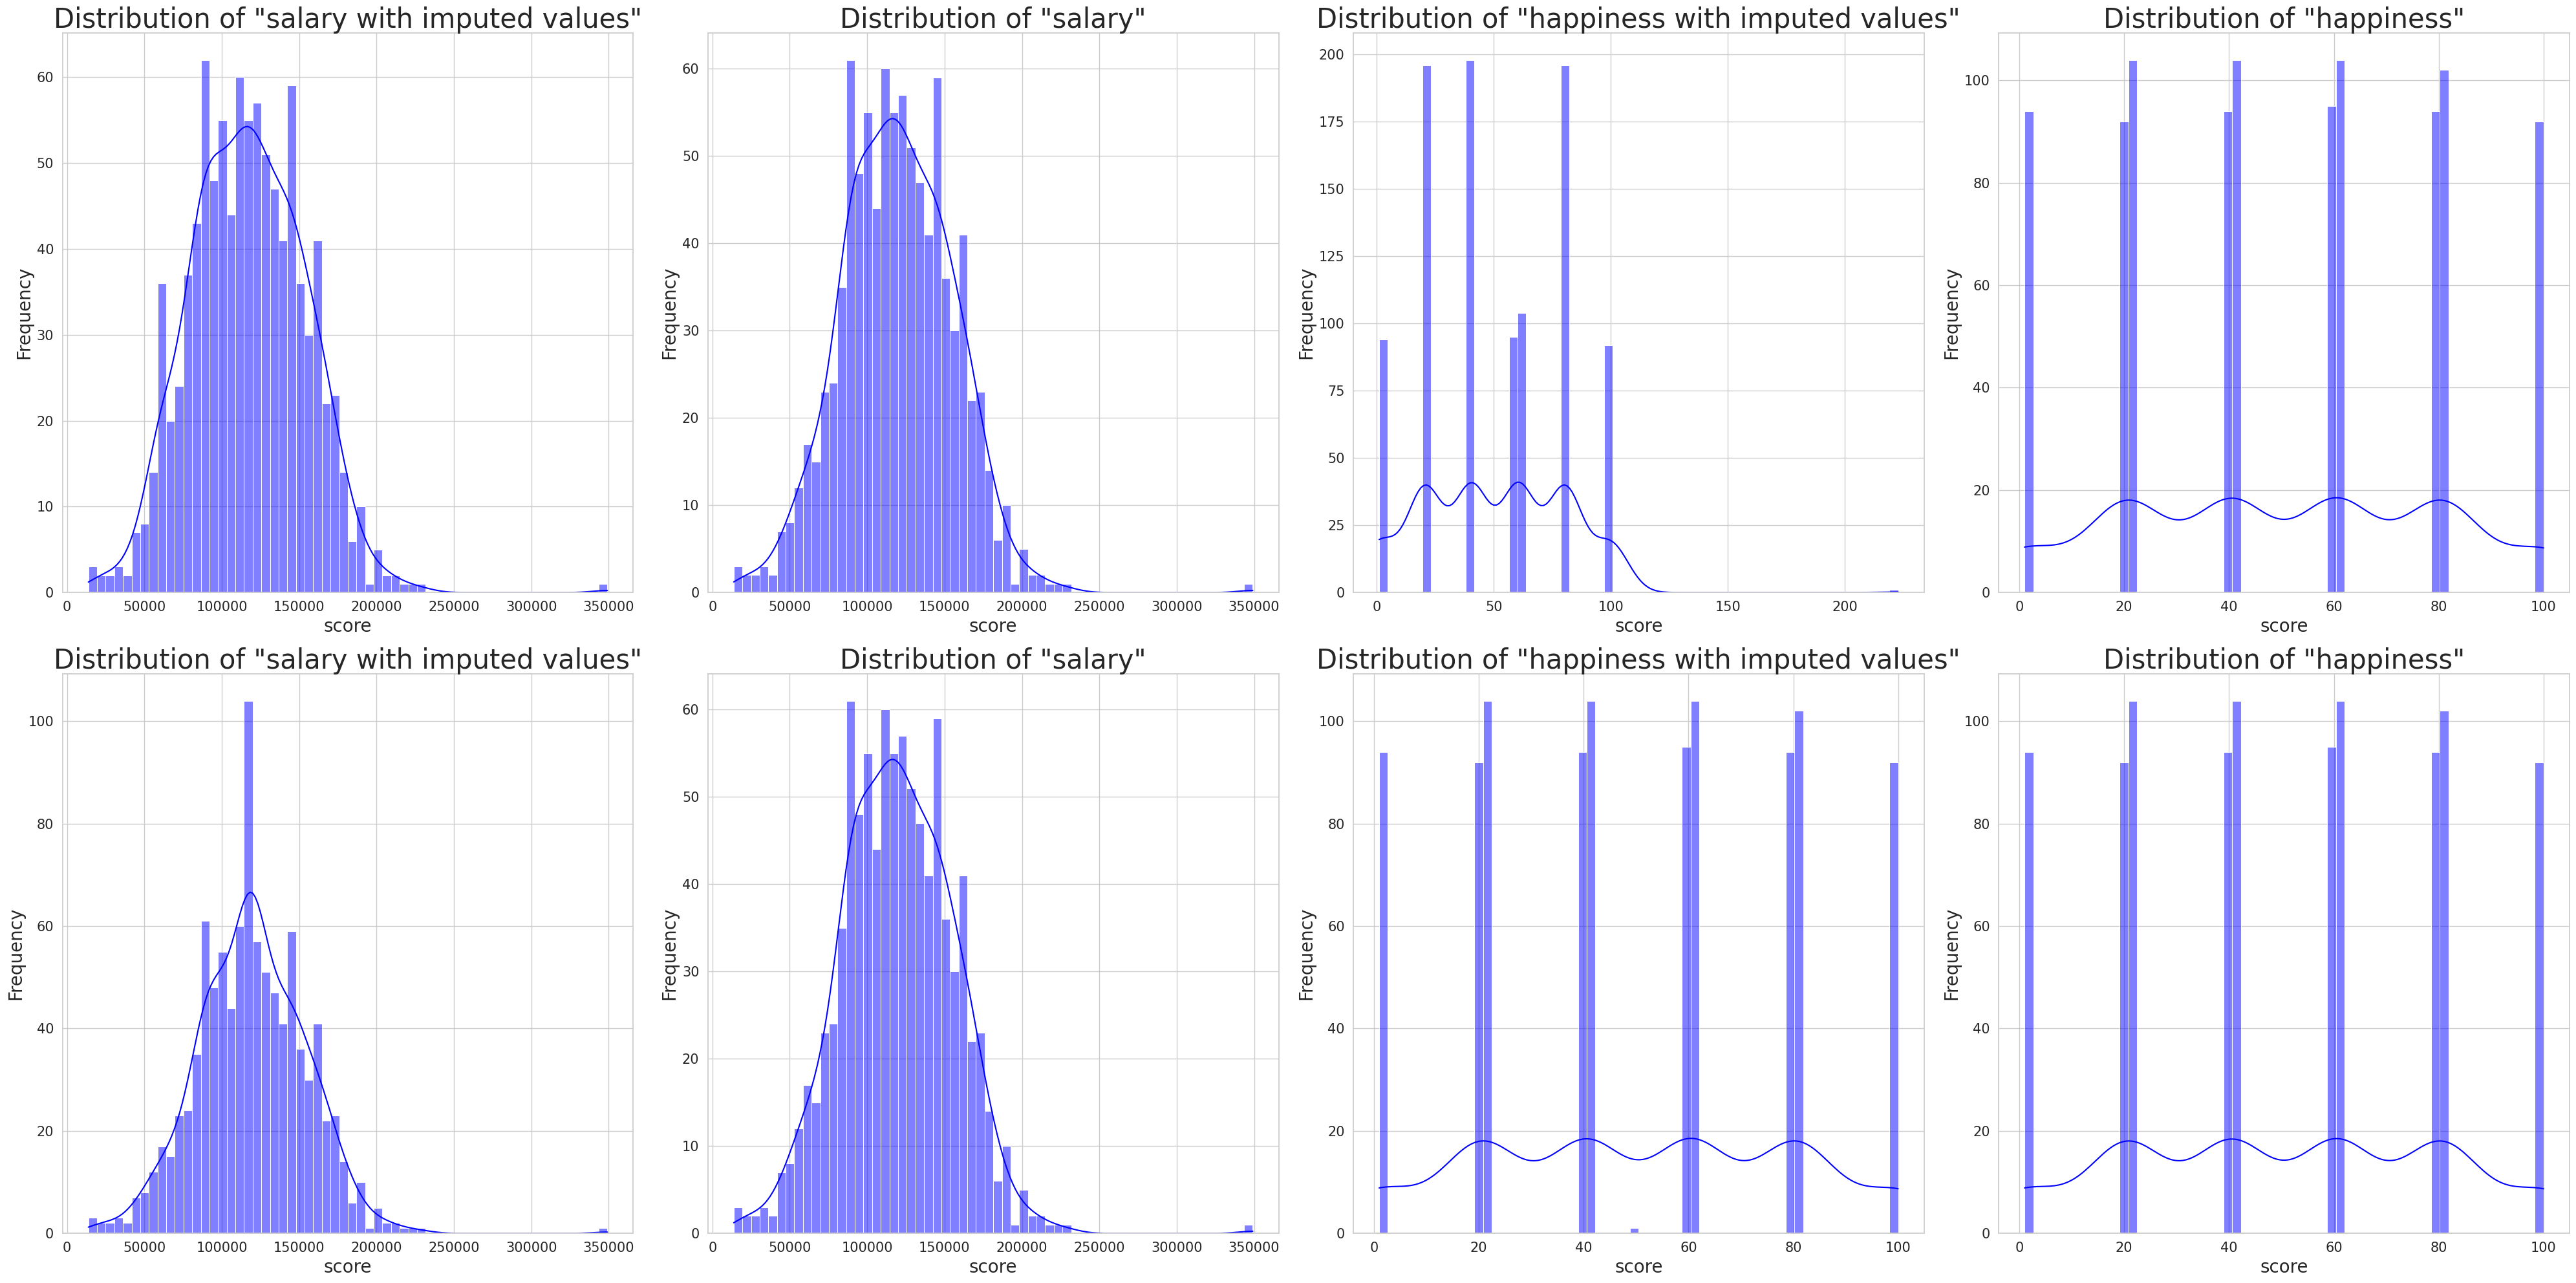

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(40, 20))

# First row
plt.subplot(2, 4, 1)
sns.histplot(df_imputed["salary"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "salary with imputed values"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2, 4, 2)
sns.histplot(base_df["salary"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "salary"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2, 4, 3)
sns.histplot(df_imputed["happiness"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "happiness with imputed values"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2, 4, 4)
sns.histplot(base_df["happiness"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "happiness"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Second row
plt.subplot(2, 4, 5)
sns.histplot(df_simple_imputed["salary"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "salary with imputed values"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2, 4, 6)
sns.histplot(base_df["salary"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "salary"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2, 4, 7)
sns.histplot(df_simple_imputed["happiness"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "happiness with imputed values"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2, 4, 8)
sns.histplot(base_df["happiness"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "happiness"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

These images show the distributions after the imputations, on the first row with the IterativeImputer, in the second row with the SimpleImputer. The imputed value for happiness from the IterativeImputer is very high, which can be explained because of the corresponding high salary value of the row. There is a high correlation between those two features, which explains, why the Imputer predicted this high value. However, we assume from domain knowledge that the value of happiness can´t surpass 100, which is why we are going to change this value to 100 in the next cell.

In general, the IterativeImputer seems to perform better here, the normal distribution of the "salary" feature is much better resembled than with the values from the SimpleImputer.

This interpretation doesn´t differ from the one on the dataset WITH outliers. However, you can clearly see the differences in the images: There are no negative values for salary anymore, and the curve is much lower.

In [11]:
max_index = df_imputed["happiness"].idxmax()
df_imputed.loc[max_index, "happiness"] = 100
print(df_imputed.loc[max_index])

score            50.000000
salary       349110.332462
happiness       100.000000
Age              25.000000
Name: 932, dtype: float64


In [12]:
#df_imputed.to_csv("data_1_imputed_wo_outliers.csv")